In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
engagement = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding = 'latin-1') # encoding = 'latin-1' to avoid UnicodeDecodeError; took a while to figure out

In [4]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [9]:
engagement.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [12]:
engagement.shape

(207917, 3)

In [14]:
# Unique values
engagement.nunique().sum()

216044

In [18]:
engagement.duplicated().sum()

0

In [25]:
len(engagement['user_id'].unique()) # Important to note that since this is an array we needed to use len() instead of .nunique()

8823

In [60]:
len(engagement['date_time'].unique())

207220

In [31]:
#Alternative way to get unique values
value_counts = engagement['user_id'].value_counts()
value_counts

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64

In [30]:
value_counts.shape

(8823,)

In [33]:
engagement.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [34]:
engagement.index

RangeIndex(start=0, stop=207917, step=1)

In [5]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [8]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [10]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [11]:
users.shape

(12000, 10)

In [16]:
users.nunique().sum()

59142

In [17]:
users.duplicated().sum()

0

In [38]:
# Convert date time
import datetime as dt
engagement['date_time'] = pd.to_datetime(engagement['time_stamp'])
engagement.drop('time_stamp', axis=1, inplace=True)
engagement.head()

,user_id,visited,date_time
0,1,1,2014-04-22 03:53:30
1,2,1,2013-11-15 03:45:04
2,2,1,2013-11-29 03:45:04
3,2,1,2013-12-09 03:45:04
4,2,1,2013-12-25 03:45:04


In [39]:
# Converting date time to date
engagement_2 = engagement.copy()
engagement_2['date'] = engagement_2['date_time'].dt.date
engagement_2.drop('date_time', axis=1, inplace=True)
engagement_2.head()

,user_id,visited,date
0,1,1,2014-04-22
1,2,1,2013-11-15
2,2,1,2013-11-29
3,2,1,2013-12-09
4,2,1,2013-12-25


An "adopted user" logs into the product on three seperate days within a seven-day period

In [40]:
# Adopted user (active on 3 separate days in at least one 7-day period) column to be added to engagement dataframe
engagement_2['adopted_user'] = 0
engagement_2.head()

,user_id,visited,date,adopted_user
0,1,1,2014-04-22,0
1,2,1,2013-11-15,0
2,2,1,2013-11-29,0
3,2,1,2013-12-09,0
4,2,1,2013-12-25,0


In [68]:
# Converting engagament 2 date to datetime
engagement_2['date'] = pd.to_datetime(engagement_2['date'])

In [101]:
engagement_3 = engagement_2.reset_index(drop=True)
engagement_3.head()

,user_id,visited,date,adopted_user
0,1,1,2014-04-22,0
1,2,1,2013-11-15,0
2,2,1,2013-11-29,0
3,2,1,2013-12-09,0
4,2,1,2013-12-25,0


In [102]:
# Group by user_id and date
engagement_3 = engagement_3.groupby(['user_id', 'date']).sum()
engagement_3.head(10)

visited  adopted_user
user_id date                             
1       2014-04-22        1             0
2       2013-11-15        1             0
        2013-11-29        1             0
        2013-12-09        1             0
        2013-12-25        1             0
        2013-12-31        1             0
        2014-01-08        1             0
        2014-02-03        1             0
        2014-02-08        1             0
        2014-02-09        1             0

In [103]:
engagement_3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 207917 entries, (1, Timestamp('2014-04-22 00:00:00')) to (12000, Timestamp('2014-01-26 00:00:00'))
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   visited       207917 non-null  int64
 1   adopted_user  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [104]:
engagement_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       207917 non-null  int64         
 1   visited       207917 non-null  int64         
 2   date          207917 non-null  datetime64[ns]
 3   adopted_user  207917 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.3 MB


In [56]:
# Alternative to groupby
pivot_table = pd.pivot_table(engagement_2, index=['user_id', 'date'], columns=['adopted_user'], aggfunc='sum')
pivot_table

visited
adopted_user             0
user_id date              
1       2014-04-22       1
2       2013-11-15       1
        2013-11-29       1
        2013-12-09       1
        2013-12-25       1
...                    ...
11996   2013-09-06       1
11997   2013-01-15       1
11998   2014-04-27       1
11999   2012-06-02       1
12000   2014-01-26       1

[207917 rows x 1 columns]

Using the rolling method to calculate the number of visits within a week (7 days) for each user.

In [111]:
# Reset index
engagement_4 = engagement_3.reset_index()
engagement_4.head()

,user_id,date,visited,adopted_user
0,1,2014-04-22,1,0
1,2,2013-11-15,1,0
2,2,2013-11-29,1,0
3,2,2013-12-09,1,0
4,2,2013-12-25,1,0


In [107]:
engagement_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       207917 non-null  int64         
 1   date          207917 non-null  datetime64[ns]
 2   visited       207917 non-null  int64         
 3   adopted_user  207917 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.3 MB


In [110]:
user_weekly_counts = engagement_3.groupby('user_id')['visited'].resample('7D').sum().reset_index()
user_weekly_counts.head(10)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'MultiIndex'

USing a different method

In [113]:
# Assuming your dataframe is named 'engagement_2'

# Step 1: Convert 'date' to datetime format
engagement_2['date'] = pd.to_datetime(engagement_2['date'])

# Step 2: Create a new column for the combination of year and week number
engagement_2['year_week'] = engagement_2['date'].dt.strftime('%Y-%U')

# Step 3: Group the dataframe by 'user_id' and 'year_week'
grouped = engagement_2.groupby(['user_id', 'year_week'])

# Step 4: Count the number of visits in each week for each user
counts = grouped['visited'].count()

# Step 5: Filter and label 'adopted' users with at least 3 visits within a week
adopted_users = counts[counts >= 3].reset_index()['user_id'].unique()
engagement_2['adopted'] = engagement_2['user_id'].isin(adopted_users)

# Now the 'adopted' column will have 'True' for users with at least 3 visits within a week (considering the year), and 'False' otherwise.

# The dataframe 'engagement_2' is now updated with the 'adopted' column.
engagement_2.head()

,user_id,visited,date,adopted_user,year_week,adopted
0,1,1,2014-04-22,0,2014-16,False
1,2,1,2013-11-15,0,2013-45,False
2,2,1,2013-11-29,0,2013-47,False
3,2,1,2013-12-09,0,2013-49,False
4,2,1,2013-12-25,0,2013-51,False


In [114]:
# Change adopted column to 1 and 0
engagement_2['adopted'] = engagement_2['adopted'].astype(int)
engagement_2.head()

,user_id,visited,date,adopted_user,year_week,adopted
0,1,1,2014-04-22,0,2014-16,0
1,2,1,2013-11-15,0,2013-45,0
2,2,1,2013-11-29,0,2013-47,0
3,2,1,2013-12-09,0,2013-49,0
4,2,1,2013-12-25,0,2013-51,0


In [117]:
# How many of engaged users are adopted?
engagement_2['adopted'].value_counts(normalize=True)

1    0.944199
0    0.055801
Name: adopted, dtype: float64

In [121]:
engagement_2[engagement_2['adopted'] == 0].head(20)

,user_id,visited,date,adopted_user,year_week,adopted
0,1,1,2014-04-22,0,2014-16,0
1,2,1,2013-11-15,0,2013-45,0
2,2,1,2013-11-29,0,2013-47,0
3,2,1,2013-12-09,0,2013-49,0
4,2,1,2013-12-25,0,2013-51,0
5,2,1,2013-12-31,0,2013-52,0
6,2,1,2014-01-08,0,2014-01,0
7,2,1,2014-02-03,0,2014-05,0
8,2,1,2014-02-08,0,2014-05,0
9,2,1,2014-02-09,0,2014-06,0


In [122]:
engagement_2[engagement_2['adopted']==1].head(20)

,user_id,visited,date,adopted_user,year_week,adopted
20,10,1,2013-01-16,0,2013-02,1
21,10,1,2013-01-22,0,2013-03,1
22,10,1,2013-01-30,0,2013-04,1
23,10,1,2013-02-04,0,2013-05,1
24,10,1,2013-02-06,0,2013-05,1
25,10,1,2013-02-14,0,2013-06,1
26,10,1,2013-02-17,0,2013-07,1
27,10,1,2013-02-19,0,2013-07,1
28,10,1,2013-02-26,0,2013-08,1
29,10,1,2013-03-01,0,2013-08,1


In [124]:
# Unique user id
engagement_2[engagement_2['adopted']==1].nunique()

user_id         1432
visited            1
date             733
adopted_user       1
year_week        108
adopted            1
dtype: int64

In [125]:
engagement_2[engagement_2['adopted']==0].nunique()

user_id         7391
visited            1
date             736
adopted_user       1
year_week        108
adopted            1
dtype: int64

1432 Unique customers are adopted and 7391 users are not adopted.

In [130]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


We can merge the user ID with object ID with the adoption and analyze each column's effect separately. We'll have to create a user id vs adoption dataframe for that

In [127]:
#Creating a user_id adopted user dataframe
engagement_5= engagement_2.copy()

In [129]:
# Delete duplicate rows for user_id
engagement_5.drop_duplicates(subset='user_id', keep='first', inplace=True)
engagement_5.head(20)

,user_id,visited,date,adopted_user,year_week,adopted
0,1,1,2014-04-22,0,2014-16,0
1,2,1,2013-11-15,0,2013-45,0
15,3,1,2013-03-19,0,2013-11,0
16,4,1,2013-05-22,0,2013-20,0
17,5,1,2013-01-22,0,2013-03,0
18,6,1,2013-12-19,0,2013-50,0
19,7,1,2012-12-20,0,2012-51,0
20,10,1,2013-01-16,0,2013-02,1
304,11,1,2013-12-27,0,2013-51,0
305,13,1,2014-03-30,0,2014-13,0


In [131]:
engagement_5.shape

(8823, 6)

Turns out the number of users on the engagement database is less than the number of the users. We;ll be doing a inner merge

In [133]:
# Inner join users and engagement_5
users_2= pd.merge(users, engagement_5, left_on='object_id', right_on= 'user_id', how='inner')
users_2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited,date,adopted_user,year_week,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,1,2014-04-22,0,2014-16,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,2013-11-15,0,2013-45,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,1,2013-03-19,0,2013-11,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4,1,2013-05-22,0,2013-20,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5,1,2013-01-22,0,2013-03,0


In [135]:
# Drop the user_id column
users_3= users_2.drop(['user_id', 'visited', 'date', 'adopted_user', 'year_week'], axis=1)
users_3.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


<AxesSubplot:xlabel='adopted', ylabel='invited_by_user_id'>

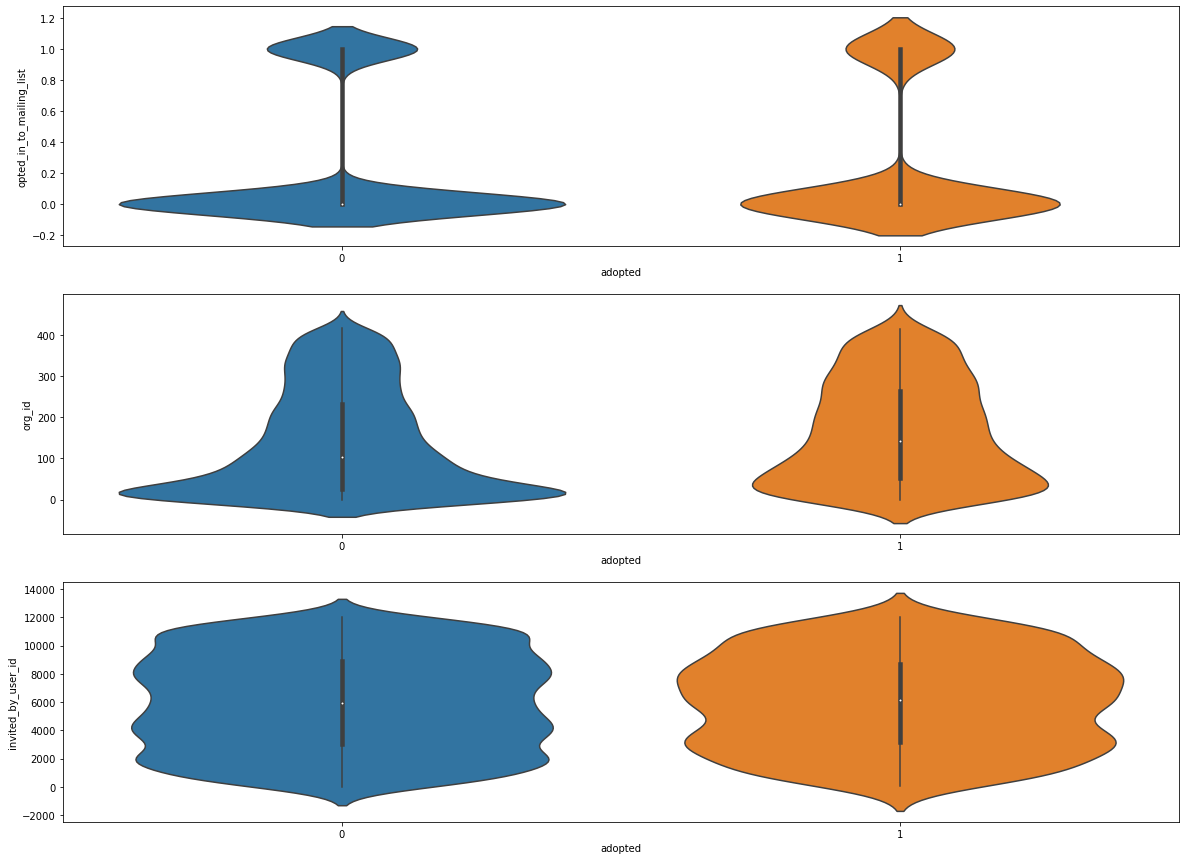

In [138]:
# Violinplot of each column based on adopted or not
plt.subplots(figsize=(20,15))
plt.subplot(3,1,1)
sns.violinplot(x='adopted', y='opted_in_to_mailing_list', data=users_3)

plt.subplot(3,1,2)
sns.violinplot(x='adopted', y='org_id', data=users_3)

plt.subplot(3,1,3)
sns.violinplot(x='adopted', y='invited_by_user_id', data=users_3)


Turns out nothing is separating them adopted vs non-adopted in these 3 analysis. May be the 'last session creation time" and the engagement database can be further analyzed for any differences.

In [140]:
#Analyzing "last session creation time" column
users_3['last_session_creation_time'].sort_values().head()

7357    1.338452e+09
7269    1.338485e+09
8399    1.338515e+09
1450    1.338556e+09
7473    1.338561e+09
Name: last_session_creation_time, dtype: float64

<AxesSubplot:ylabel='Density'>

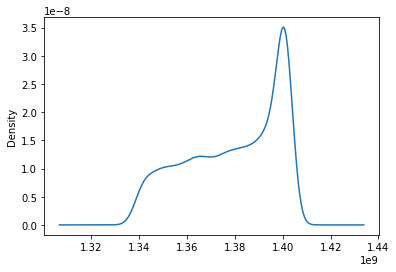

In [141]:
# kdeplot of last_session_creation_time
users_3['last_session_creation_time'].plot(kind='kde')

This is a huge number. And I have no idea what it meeans. But it does have an interesting distribution flat left tail. Would be nice to get more info into this one.

Let's analyze the engagement databse

In [145]:
engagement_6 = engagement_2.copy()
engagement_6.head()

,user_id,visited,date,adopted_user,year_week,adopted
0,1,1,2014-04-22,0,2014-16,0
1,2,1,2013-11-15,0,2013-45,0
2,2,1,2013-11-29,0,2013-47,0
3,2,1,2013-12-09,0,2013-49,0
4,2,1,2013-12-25,0,2013-51,0


In [146]:
# Group this by user id and counts of date
engagement_7 = engagement_6.groupby('user_id')['visited', 'year_week'].count().reset_index()
engagement_7.head(30)

C:\Users\aubhi\AppData\Local\Temp/ipykernel_34108/2198308570.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  engagement_7 = engagement_6.groupby('user_id')['visited', 'year_week'].count().reset_index()


,user_id,visited,year_week
0,1,1,1
1,2,14,14
2,3,1,1
3,4,1,1
4,5,1,1
5,6,1,1
6,7,1,1
7,10,284,284
8,11,1,1
9,13,1,1


In [149]:
# Merge engagement_7 and engagement_6 left
engagement_8= engagement_6.drop(['visited','date','adopted_user','year_week'], axis=1)
engagement_9 = pd.merge(engagement_7, engagement_8, left_on='user_id', right_on='user_id', how='left')
engagement_9.head(30)

,user_id,visited,year_week,adopted
0,1,1,1,0
1,2,14,14,0
2,2,14,14,0
3,2,14,14,0
4,2,14,14,0
5,2,14,14,0
6,2,14,14,0
7,2,14,14,0
8,2,14,14,0
9,2,14,14,0


<AxesSubplot:xlabel='adopted', ylabel='visited'>

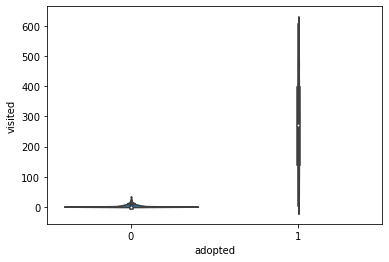

In [150]:
sns.violinplot(x='adopted', y='visited', data=engagement_9)

Turns out the people who visited more are adopted!! This is a little bit of a circular logic, but is an indication that there may be some exponential relationship going on and heavy users should be targeted